# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from ratelimit import limits
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities)

['faanui', 'oksfjord', 'padang', 'nikolskoye', 'vaini', 'lagoa', 'ngunguru', 'barrow', 'ati', 'ijaki', 'albany', 'ushuaia', 'afua', 'yulara', 'rikitea', 'gladstone', 'hobart', 'ribeira grande', 'obidos', 'mar del plata', 'bluff', 'vila franca do campo', 'majholi', 'linchuan', 'samusu', 'pontianak', 'buala', 'port alfred', 'hithadhoo', 'thompson', 'barentsburg', 'solnechnyy', 'ust-koksa', 'arraial do cabo', 'touros', 'hermanus', 'muravlenko', 'cabo san lucas', 'lockhart', 'hofn', 'saint-philippe', 'geraldton', 'attawapiskat', 'amderma', 'clyde river', 'illoqqortoormiut', 'portland', 'busselton', 'dikson', 'kaitangata', 'nanortalik', 'lasa', 'zabol', 'punta arenas', 'torbay', 'butaritari', 'nizwa', 'salalah', 'carnarvon', 'new norfolk', 'san cristobal', 'taolanaro', 'temaraia', 'iqaluit', 'te anau', 'garissa', 'mataura', 'cape town', 'kaminokawa', 'la puebla de cazalla', 'acapulco', 'talnakh', 'hilo', 'atuona', 'bethel', 'jamestown', 'biak', 'bredasdorp', 'terre haute', 'calmar', 'corowa

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Building API Calls

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"

# Building a Dictionary to store data
city_weather = {"City": [],
             "Lat": [],
             "Lng": [],
             "Max Temp": [],
             "Humidity": [],
             "Cloudiness": [],
             "Wind Speed": [],
             "Country": [],
             "Date": []}


# Params Dictionary
params = {
    "api_key":weather_api_key,
    "units":units,
    "city":city}
    

# Getting Weather Data
response = requests.get(query_url).json()

# print(response)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": 42.6001,
        "lon": -73.9662
    },
    "dt": 1659014720,
    "id": 5106841,
    "main": {
        "feels_like": 24.45,
        "humidity": 72,
        "pressure": 1007,
        "temp": 24.1,
        "temp_max": 25.33,
        "temp_min": 23.23
    },
    "name": "Albany",
    "sys": {
        "country": "US",
        "id": 19530,
        "sunrise": 1659001415,
        "sunset": 1659054054,
        "type": 2
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 167,
        "gust": 1.59,
        "speed": 1.05
    }
}


In [4]:
print("----------------------------- Beginning Data Retrieval  -----------------------------")
MINUTE = 60
@limits(calls=60, period=MINUTE)
record_num = 1
city_count = len(cities)

def data_retrieval():
    
    # Looping through city list and then appendinig results into dictionary
    for city in cities:
        query_url = f"{base_url}appid={weather_api_key}&units=Imperial&q={city}"
        response = requests.get(query_url).json()
        
        try:
            print(f'Processing Weather Data for Record {record_num} of {city_count}: {response["name"]}')
        
            city_weather["City"].append(response["name"])
            city_weather["Lat"].append(response["coord"]["lat"])
            city_weather["Lng"].append(response["coord"]["lon"])
            city_weather["Max Temp"].append(response["main"]["temp_max"])
            city_weather["Humidity"].append(response["main"]["humidity"])
            city_weather["Cloudiness"].append(response["clouds"]["all"])
            city_weather["Wind Speed"].append(response["wind"]["speed"])
            city_weather["Country"].append(response["sys"]["country"])
            city_weather["Date"].append(response["dt"])
            record_num +=1 

        except(KeyError, IndexError):
            print(f"{city} not found, on to the next one!")
        pass

data_retrieval()
print("----------------------------- Data Retrieval Complete -----------------------------")

----------------------------- Beginning Data Retrieval  -----------------------------
Processing Weather Data for Faanui
Processing Weather Data for Øksfjord
Processing Weather Data for Padang
Processing Weather Data for Nikolskoye
Processing Weather Data for Vaini
Processing Weather Data for Lagoa
Processing Weather Data for Ngunguru
Processing Weather Data for Barrow
Processing Weather Data for Ati
ijaki not found, on to the next one!
Processing Weather Data for Albany
Processing Weather Data for Ushuaia
Processing Weather Data for Afuá
Processing Weather Data for Yulara
Processing Weather Data for Rikitea
Processing Weather Data for Gladstone
Processing Weather Data for Hobart
Processing Weather Data for Ribeira Grande
Processing Weather Data for Óbidos
Processing Weather Data for Mar del Plata
Processing Weather Data for Bluff
Processing Weather Data for Vila Franca do Campo
Processing Weather Data for Majholi
linchuan not found, on to the next one!
samusu not found, on to the next

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating a DataFrame
city_data_df = pd.DataFrame(city_weather)
# Exporting to CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,78.85,74,16,27.02,PF,1659015519
1,Øksfjord,70.2396,22.3479,55.47,83,96,8.25,NO,1659015519
2,Padang,-0.9492,100.3543,79.02,87,85,4.05,ID,1659015519
3,Nikolskoye,59.7035,30.7861,71.49,56,94,6.82,RU,1659015519
4,Vaini,-21.2000,-175.2000,73.56,94,75,5.75,TO,1659015520
...,...,...,...,...,...,...,...,...,...
553,Madingou,-4.1536,13.5500,89.10,36,67,6.17,CG,1659015672
554,Negara,-8.3151,114.6025,74.03,83,97,5.77,ID,1659015672
555,Ayr,55.4627,-4.6339,67.50,63,40,8.05,GB,1659015672
556,Tilichiki,60.4667,166.1000,44.98,79,100,5.84,RU,1659015673


In [6]:
# Creating a Summary Stats Table
lat = city_data_df["Lat"]
lng = city_data_df["Lng"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
date = city_data_df["Date"]

data_table = pd.DataFrame({"Lat":lat,
                          "Lng":lng,
                          "Max Temp":max_temp,
                          "Humidity":humidity,
                          "Cloudiness":cloudiness,
                          "Wind Speed":wind_speed,
                          "Date":date})
data_table.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-16.4833,-151.7500,78.85,74,16,27.02,1659015519
1,70.2396,22.3479,55.47,83,96,8.25,1659015519
2,-0.9492,100.3543,79.02,87,85,4.05,1659015519
3,59.7035,30.7861,71.49,56,94,6.82,1659015519
4,-21.2000,-175.2000,73.56,94,75,5.75,1659015520


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
print(data_table.loc[data_table['Humidity'] > 100])

Empty DataFrame
Columns: [Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Date]
Index: []


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.dropna(inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.4833,-151.7500,78.85,74,16,27.02,PF,1659015519
1,Øksfjord,70.2396,22.3479,55.47,83,96,8.25,NO,1659015519
2,Padang,-0.9492,100.3543,79.02,87,85,4.05,ID,1659015519
3,Nikolskoye,59.7035,30.7861,71.49,56,94,6.82,RU,1659015519
4,Vaini,-21.2000,-175.2000,73.56,94,75,5.75,TO,1659015520


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

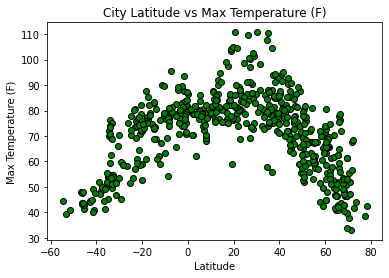

In [9]:
plt.scatter(city_weather["Lat"],city_weather["Max Temp"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

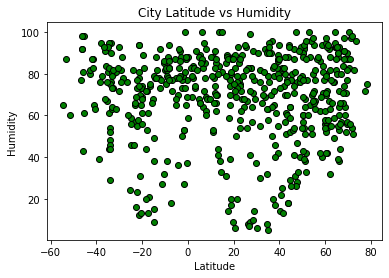

In [10]:
plt.scatter(city_weather["Lat"],city_weather["Humidity"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

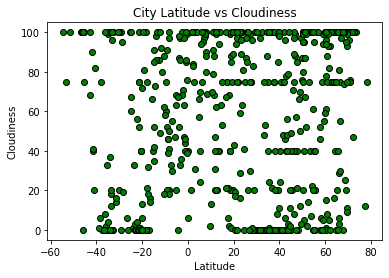

In [11]:
plt.scatter(city_weather["Lat"],city_weather["Cloudiness"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

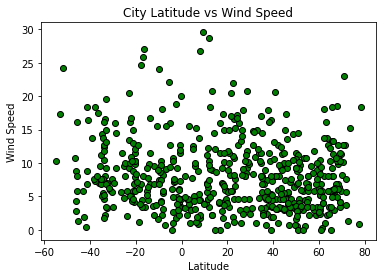

In [12]:
plt.scatter(city_weather["Lat"],city_weather["Wind Speed"], facecolor="green", edgecolor="black")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [13]:
# First Separate Northern Hemisphere from Southern Hemisphere

northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

In [19]:
# Creating a function for Linear Regression
def linregress(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between max temperature and latitude is -0.66


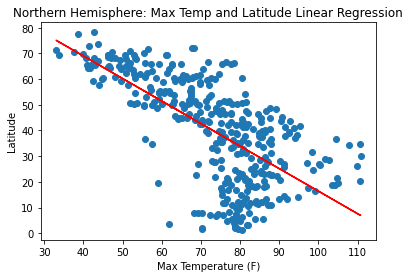

In [43]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Max Temp"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(northern_hemisphere["Max Temp"],northern_hemisphere["Lat"])
print(f"The correlation between max temperature and latitude is {round(correlation[0],2)}")


# Formatting
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Max Temp and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Max Temp vs Latitude Linear Regression")


When comparing max temperaure and latitude in the northern hemisphere, there is a negative correlation of -0.66.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between max temperature and latitude is 0.8


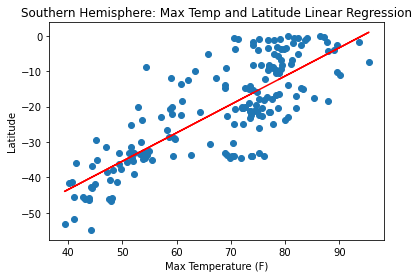

In [44]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Max Temp"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Max Temp"],southern_hemisphere["Lat"])
print(f"The correlation between max temperature and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Max Temp and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Max Temp vs Latitude Linear Regression")



When comparing max temperaure and latitude in the northern hemisphere, there is a slight positive correlation of 0.8.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude is -0.05


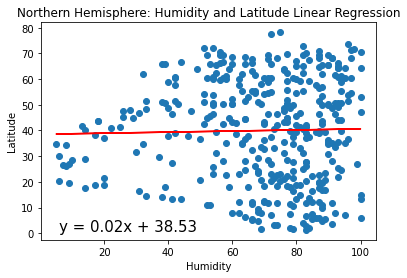

In [51]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Humidity"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Humidity"],southern_hemisphere["Lat"])
print(f"The correlation between humidity and latitude is {round(correlation[0],2)}")


# Formatting
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Humidity and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Humidity vs Latitude Linear Regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity and latitude is -0.05


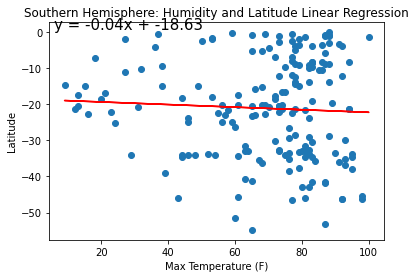

In [49]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Humidity"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Humidity"],southern_hemisphere["Lat"])
print(f"The correlation between humidity and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Humidity and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Humidity vs Latitude Linear Regression")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloudiness and latitude is 0.01


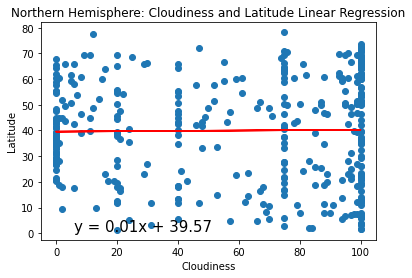

In [48]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Cloudiness"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(northern_hemisphere["Cloudiness"],northern_hemisphere["Lat"])
print(f"The correlation between cloudiness and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Cloudiness and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Cloudiness vs Latitude Linear Regression")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloudiness and latitude is 0.08


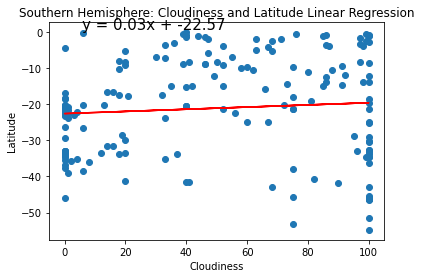

In [47]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Cloudiness"],southern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Cloudiness"],southern_hemisphere["Lat"])
print(f"The correlation between cloudiness and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Cloudiness and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Cloudiness vs Latitude Linear Regression")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude is -0.08


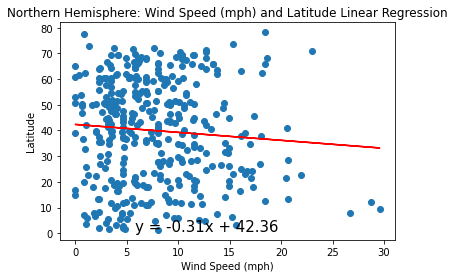

In [46]:
# Linear Regression Model fx 1

equation = linregress(northern_hemisphere["Wind Speed"],northern_hemisphere["Lat"])

# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(northern_hemisphere["Wind Speed"],northern_hemisphere["Lat"])
print(f"The correlation between wind speed and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Northern Hemisphere: Wind Speed (mph) and Latitude Linear Regression")
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude is -0.13


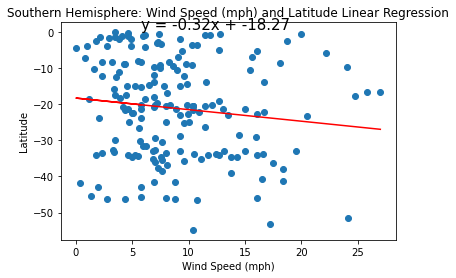

In [45]:
# Linear Regression Model fx 1

equation = linregress(southern_hemisphere["Wind Speed"],southern_hemisphere["Lat"])


# Fx 2
plt.annotate(equation,(5.8,0.8),fontsize=15)
correlation = st.pearsonr(southern_hemisphere["Wind Speed"],southern_hemisphere["Lat"])
print(f"The correlation between wind speed and latitude is {round(correlation[0],2)}")

# Formatting
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.title("Southern Hemisphere: Wind Speed (mph) and Latitude Linear Regression")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")